# Different Models fitting

In [1]:
import pymongo
from pymongo import MongoClient
client = MongoClient('mongodb://127.0.0.1:27017')
db = client.sample

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVR
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.linear_model import HuberRegressor

### Dataset load and scaling

In [2]:
samples = pd.read_csv('../features collection/results/tot/tot_teams_vectors_weighted.csv')
samples = samples.drop(samples.columns[0], axis=1)
samples_log = samples.apply(np.log)
samples_log = samples_log.replace(-np.inf, 0)
samples_log = samples_log.fillna(0)
transformer = RobustScaler().fit(samples_log)
samples_scaled = pd.DataFrame(transformer.transform(samples_log), columns=list(samples))
samples_scaled

,team_nusers,team_degree,team_degree_centrality,team_betweenness_centrality,team_closeness_centrality,team_eigenvector_centrality,team_pagerank,team_avg_users_nshot,team_avg_users_in_degree,team_avg_users_out_degree,...,team_avg_users_diversity,team_avg_users_nskills,team_avg_users_nfollowers,team_avg_users_nfollowings,team_avg_users_avg_shots_ranking,team_avg_users_avg_shots_ntags,team_avg_users_avg_shots_ncomments,team_avg_users_avg_shots_nlikes,team_avg_users_avg_shots_nviews,team_avg_users_avg_shots_diversity
0,1.350220,1.098612,-1.000000,0.000000,-1.003958,-5.669961,1.281014,-0.809735,-0.180571,-0.378069,...,-1.310498,-1.113705,0.192632,-0.176497,-0.581155,-0.584770,-0.439814,-0.196167,-0.150076,-0.632524
1,-0.500000,0.000000,-1.152557,0.000000,-2.218477,0.000000,1.428941,1.361816,0.775514,1.236413,...,0.734313,1.378729,0.701195,1.210283,-0.144977,-0.519957,-0.355782,-0.445678,-0.665175,-0.286485
2,0.292481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.842107,0.711205,0.141887,...,-0.025271,0.221279,0.650604,0.117672,-1.319990,0.434231,-0.932883,0.258334,-0.072858,-0.491249
3,0.292481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.750344,0.198898,0.358088,...,0.313982,0.301170,-0.043921,0.158985,0.092870,0.752844,0.725180,0.813066,0.828153,-0.059984
4,1.403677,1.098612,-1.000000,-7.635494,-1.026949,-7.777640,1.411326,-1.051438,0.296655,-0.127682,...,-1.214191,-1.120973,0.393650,0.111118,0.003954,0.092158,0.916999,1.011183,0.989715,0.095293
5,0.292481,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.156352,0.376052,1.182038,...,-0.034625,0.262224,0.199835,1.132575,-0.099842,-0.126800,-0.147396,-0.255879,-0.242358,0.103338
6,0.792481,0.000000,-1.152557,0.000000,-2.140865,0.000000,1.240603,-0.123027,-0.308102,0.170247,...,-0.465572,-0.353303,-0.102697,0.123810,-0.478339,-0.540981,-0.826248,-0.728476,-0.633093,-0.450783
7,0.000000,0.000000,-1.152557,0.000000,-2.218477,0.000000,1.428941,0.804242,0.473039,0.778411,...,-1.077961,0.071532,0.447854,0.699055,-0.915087,0.257239,0.319994,-0.140396,0.207833,-0.044308
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264537,0.525831,1.217145,...,-0.157708,-0.051517,0.895506,1.321443,0.057074,0.877973,1.337045,1.507596,1.468500,-0.114659
9,1.623964,1.386294,-0.960007,-8.477972,-1.015781,-6.143218,1.783472,-1.003862,-0.405866,-0.692991,...,-1.557531,-1.457803,-0.346713,-0.760959,-1.064953,-1.154429,-0.296360,-0.468033,-0.116404,-1.012444


In [3]:
# caricamento e normalizzazione dela variabile di target (800 teams)
def load_target(path):

    target = pd.read_csv(path)
    target = target.drop(target.columns[0], axis=1)
    target_log = target.apply(np.log)
    target_log = target_log.replace(-np.inf, 0)
    target_log = target_log.fillna(0)
    transformer = RobustScaler().fit(target_log)
    target_scaled = pd.DataFrame(transformer.transform(target_log), columns=['likes'])
    return target_scaled

In [4]:
# different target variables

target_set_nLike = load_target('../features collection/results/tot/teams_nlikes_target.csv')
target_set_nLikeNorm = load_target('../features collection/results/tot/teams_nlikesNormalized_target.csv')
target_set_rankLike = load_target('../features collection/results/tot/teams_rankLikes_target.csv')
target_set_rankLikeNorm = load_target('../features collection/results/tot/teams_rankLikesNormalized_target.csv')

### Check model accuracy in cross validation

In [20]:
def model_accuracy(reg):
    scores = cross_val_score(reg, samples_scaled, target_set_nLike, cv=5, scoring='explained_variance')
    print("%s Accuracy: %0.2f (+/- %0.2f)" % ('target_set_nLike', scores.mean(), scores.std() * 2))   
    plots(reg, 'Learning Curves', samples_scaled, target_set_nLike, 'target_set_nLike', (0.01, 1.01))

    scores = cross_val_score(reg, samples_scaled, target_set_nLikeNorm, cv=5, scoring='explained_variance')
    print("%s Accuracy: %0.2f (+/- %0.2f)" % ('target_set_nLikeNorm', scores.mean(), scores.std() * 2))
    plots(reg, 'Learning Curves', samples_scaled, target_set_nLikeNorm, 'target_set_nLikeNorm', (0.01, 1.01))

    scores = cross_val_score(reg, samples_scaled, target_set_rankLike, cv=5, scoring='explained_variance')
    print("%s Accuracy: %0.2f (+/- %0.2f)" % ('target_set_rankLike', scores.mean(), scores.std() * 2))
    plots(reg, 'Learning Curves', samples_scaled, target_set_rankLike, 'target_set_rankLike', (0.10, 1.01))

    scores = cross_val_score(reg, samples_scaled, target_set_rankLikeNorm, cv=5, scoring='explained_variance')
    print("%s Accuracy: %0.2f (+/- %0.2f)" % ('target_set_rankLikeNorm', scores.mean(), scores.std() * 2))
    plots(reg, 'Learning Curves', samples_scaled, target_set_rankLikeNorm, 'target_set_rankLikeNorm', (0.10, 1.01))

# Plot functions

In [8]:
def plots(reg, title, X, y, targetType, ylim, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    f, (ax1, ax2) = plt.subplots(1, 2)
    
    predicted = cross_val_predict(reg, samples_scaled, y, cv=5)
    ax1.scatter(y, predicted)
    ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax1.set_xlabel('Measured')
    ax1.set_ylabel('Predicted')
    
    
    ax1.set_ylim(-4,4)
    ax2 = plot_learning_curve(ax2, reg, title, X, y,ylim)
    ax2.set_ylim(ylim)
    
    fig = plt.gcf()
    fig.set_size_inches(20,10)
    
    plt.savefig(targetType+'.pdf')
    plt.show()
    

In [9]:
def plot_predictions(y):
    predicted = cross_val_predict(reg, samples_scaled, y, cv=5)
    fig, ax = plt.subplots()
    ax.scatter(y, predicted)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

In [10]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(ax, estimator, title, X, y, ylim, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    ax.set_title(title)
    
    #if ylim is not None:
        #plt.set_ylim(*ylim)

    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax.grid()

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    ax.legend(loc="best")
    return ax

# Ordinary Least squares - LinearRegression

target_set_nLike Accuracy: 0.94 (+/- 0.01)


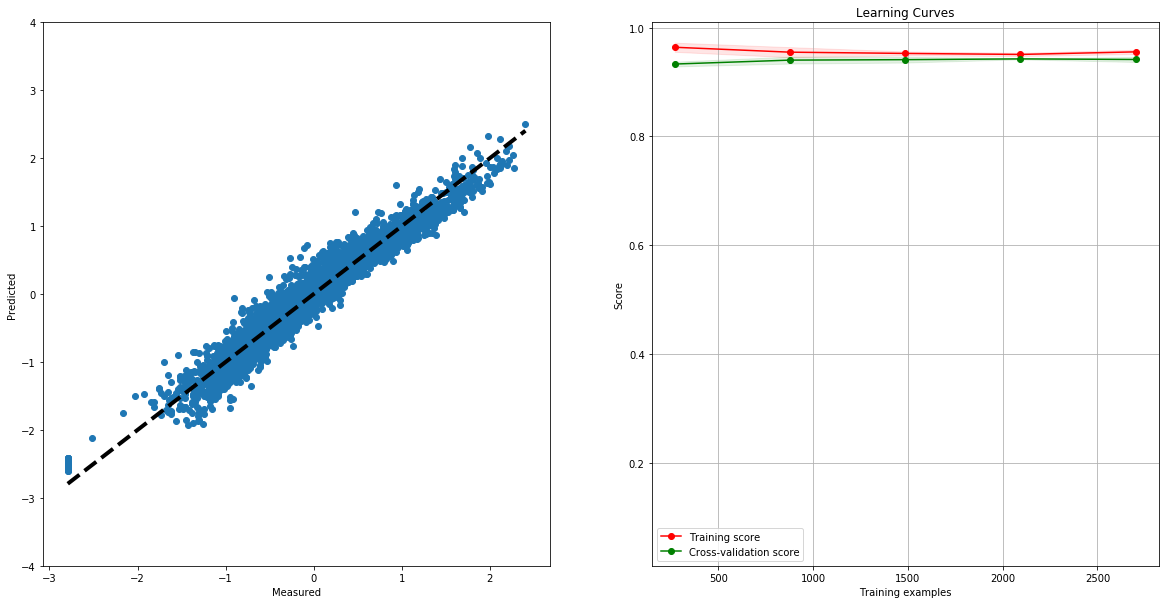

target_set_nLikeNorm Accuracy: 0.92 (+/- 0.03)


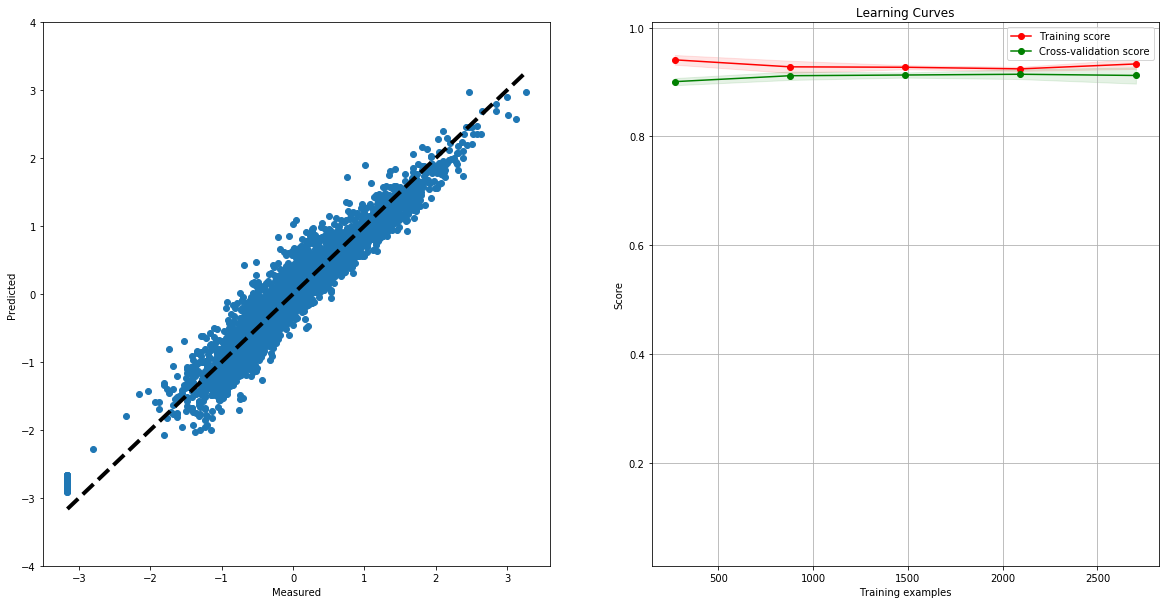

target_set_rankLike Accuracy: 0.86 (+/- 0.06)


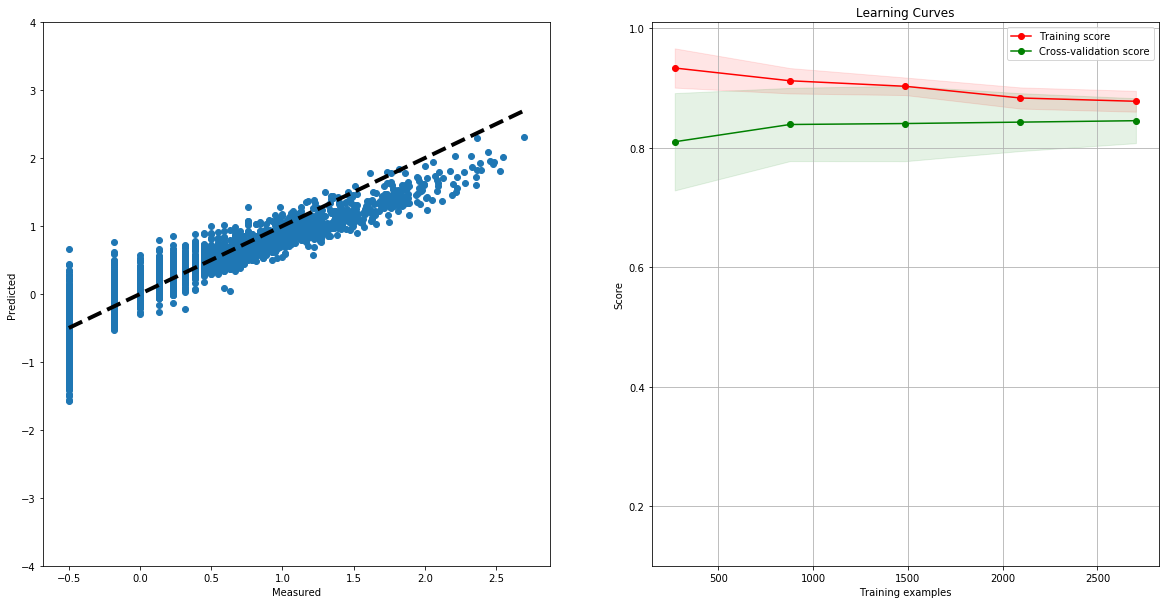

target_set_rankLikeNorm Accuracy: 0.78 (+/- 0.02)


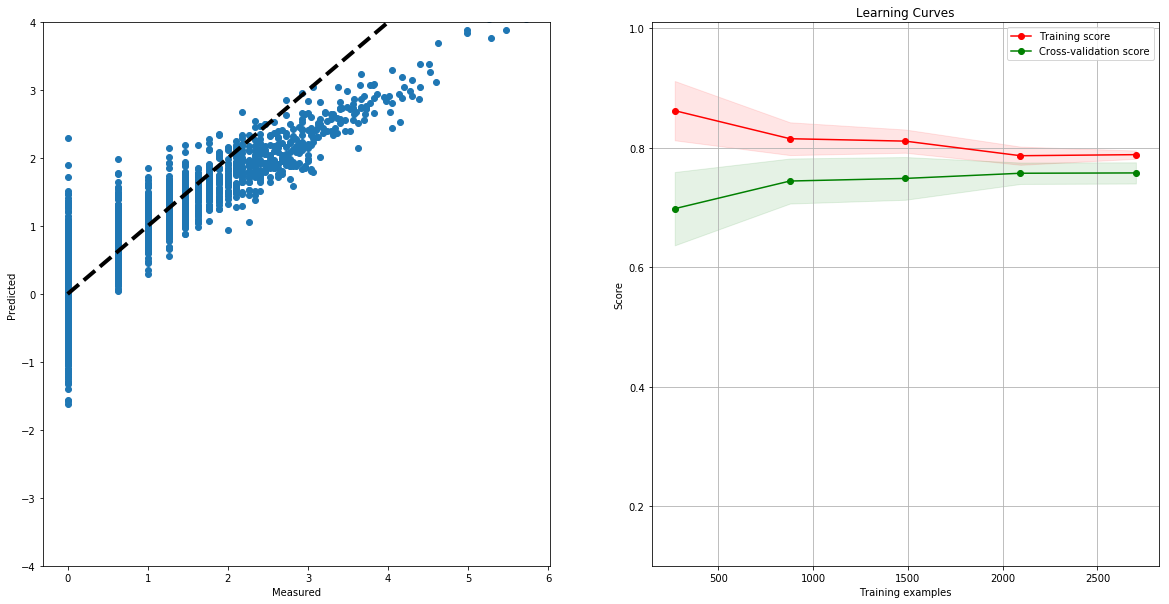

In [18]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model_accuracy(reg)


# Ridge

Fit hyperparameters

In [14]:
from sklearn.model_selection import GridSearchCV

# prepare a uniform distribution to sample for the alpha parameter
param_grid={
            "alpha": np.array([1,0.1,0.01,0.001,0.0001,0]), 
           }

# create and fit a ridge regression model, testing random alpha values
model = Ridge()
rsearch = GridSearchCV(estimator=model, param_grid=param_grid)

rsearch.fit(samples_scaled, target_set_nLike)
print 'target_set_nLike'
print 'score: ', rsearch.best_score_ 
print 'alpha: ', rsearch.best_estimator_.alpha
print '\n'

rsearch.fit(samples_scaled, target_set_nLikeNorm)
print 'target_set_nLikeNorm'
print 'score: ', rsearch.best_score_ 
print 'alpha: ', rsearch.best_estimator_.alpha
print '\n'

rsearch.fit(samples_scaled, target_set_rankLike)
print 'target_set_rankLike'
print 'score: ', rsearch.best_score_ 
print 'alpha: ', rsearch.best_estimator_.alpha
print '\n'

rsearch.fit(samples_scaled, target_set_rankLikeNorm)
print 'target_set_rankLikeNorm'
print 'score: ', rsearch.best_score_ 
print 'alpha: ', rsearch.best_estimator_.alpha

target_set_nLike
score:  0.9414656452609
alpha:  1.0


target_set_nLikeNorm
score:  0.9120828937253861
alpha:  1.0


target_set_rankLike
score:  0.8455390015341704
alpha:  1.0


target_set_rankLikeNorm
score:  0.7580273738962078
alpha:  1.0


target_set_nLike Accuracy: 0.94 (+/- 0.01)


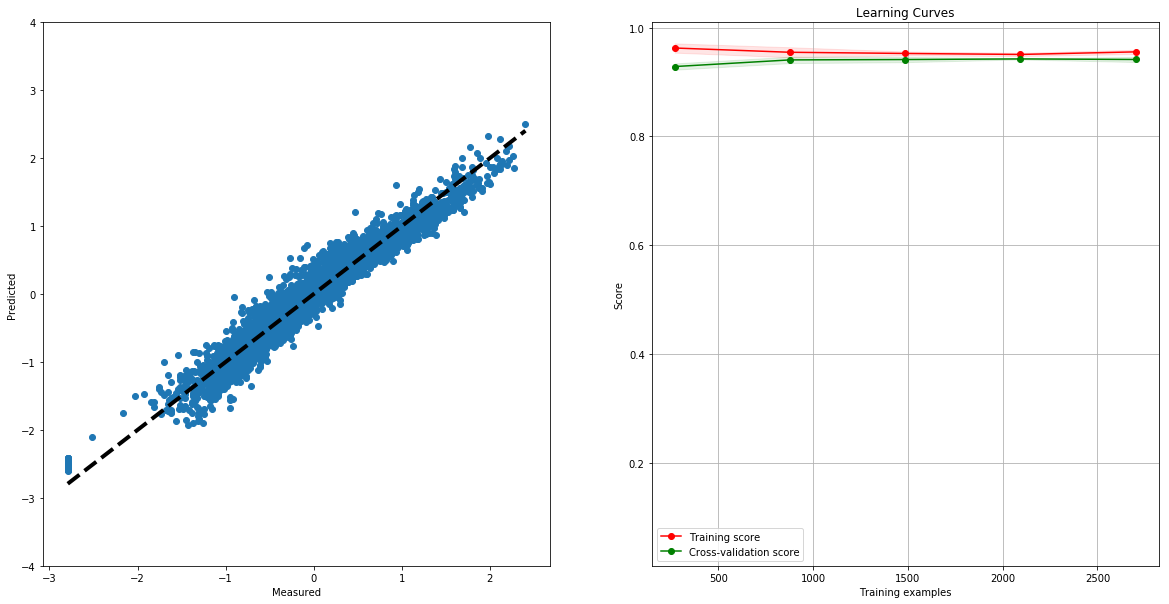

target_set_nLikeNorm Accuracy: 0.92 (+/- 0.03)


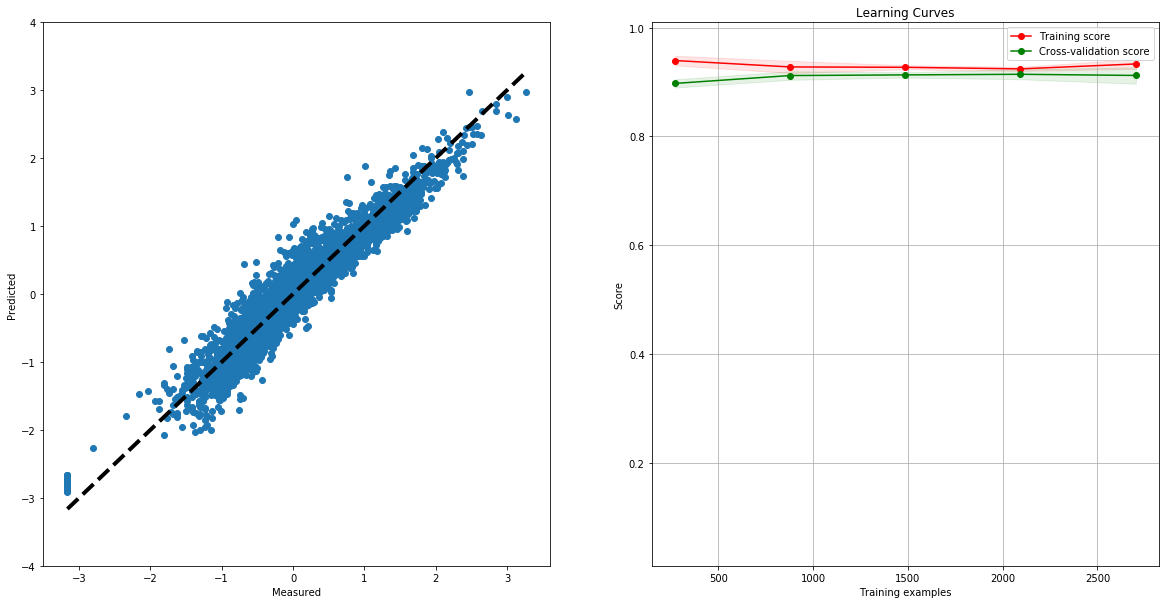

target_set_rankLike Accuracy: 0.86 (+/- 0.05)


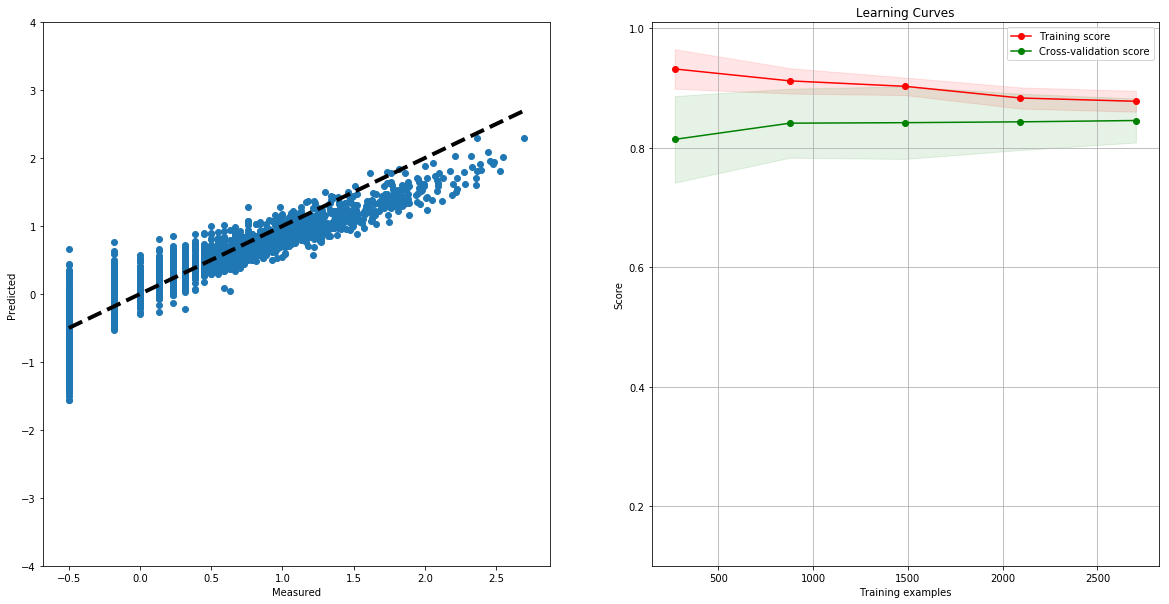

target_set_rankLikeNorm Accuracy: 0.78 (+/- 0.02)


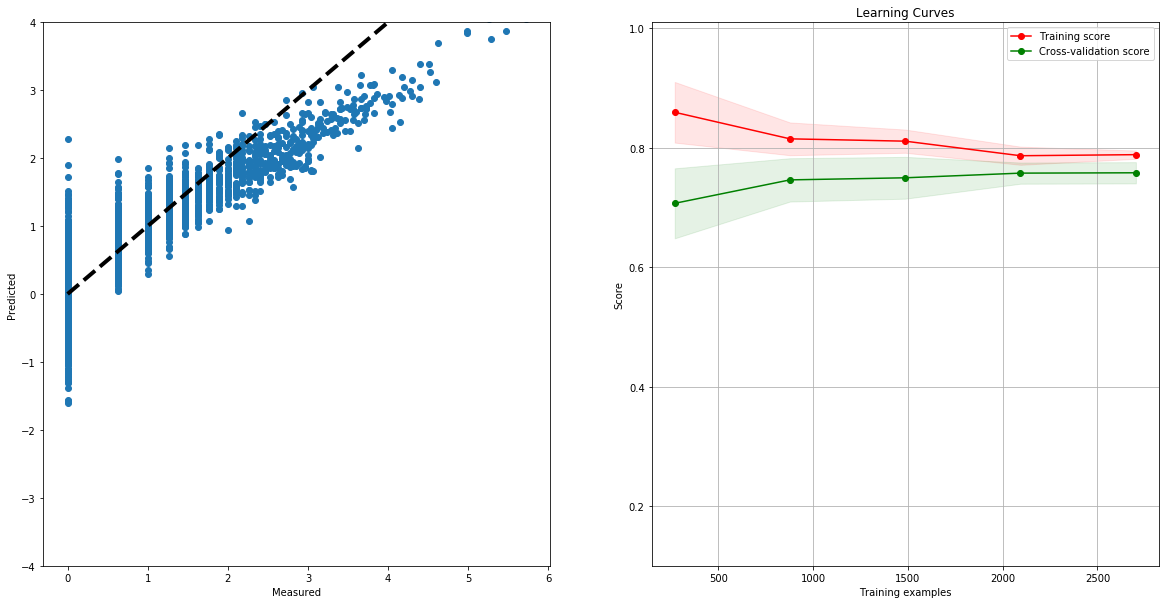

In [19]:
reg = Ridge(alpha=1.0)
model_accuracy(reg)

# Lasso

Fit hyperparameters

In [16]:
import random

# prepare a uniform distribution to sample for the alpha parameter
param = []
for i in range(10):
    param.append(random.uniform(0, 1)) 
param_grid = {'alpha': param}


model = Lasso()
rsearch = GridSearchCV(estimator=model, param_grid=param_grid)

rsearch.fit(samples_scaled, target_set_nLike)
print 'target_set_nLike'
print 'score: ', rsearch.best_score_ 
print 'alpha: ', rsearch.best_estimator_.alpha
print '\n'

rsearch.fit(samples_scaled, target_set_nLikeNorm)
print 'target_set_nLikeNorm'
print 'score: ', rsearch.best_score_ 
print 'alpha: ', rsearch.best_estimator_.alpha
print '\n'

rsearch.fit(samples_scaled, target_set_rankLike)
print 'target_set_rankLike'
print 'score: ', rsearch.best_score_ 
print 'alpha: ', rsearch.best_estimator_.alpha
print '\n'

rsearch.fit(samples_scaled, target_set_rankLikeNorm)
print 'target_set_rankLikeNorm'
print 'score: ', rsearch.best_score_ 
print 'alpha: ', rsearch.best_estimator_.alpha

target_set_nLike
score:  0.7751670626093632
alpha:  0.0903950747288


target_set_nLikeNorm
score:  0.7362254679096689
alpha:  0.0903950747288


target_set_rankLike
score:  0.6485493749770163
alpha:  0.0903950747288


target_set_rankLikeNorm
score:  0.6193255574880365
alpha:  0.0903950747288


target_set_nLike Accuracy: 0.81 (+/- 0.01)


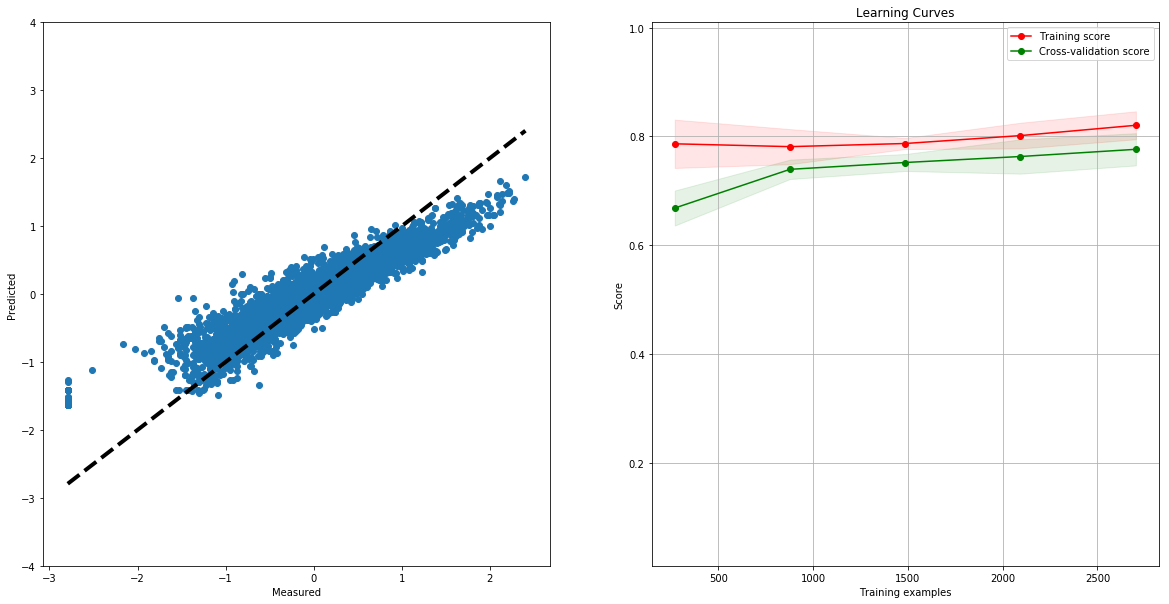

target_set_nLikeNorm Accuracy: 0.77 (+/- 0.04)


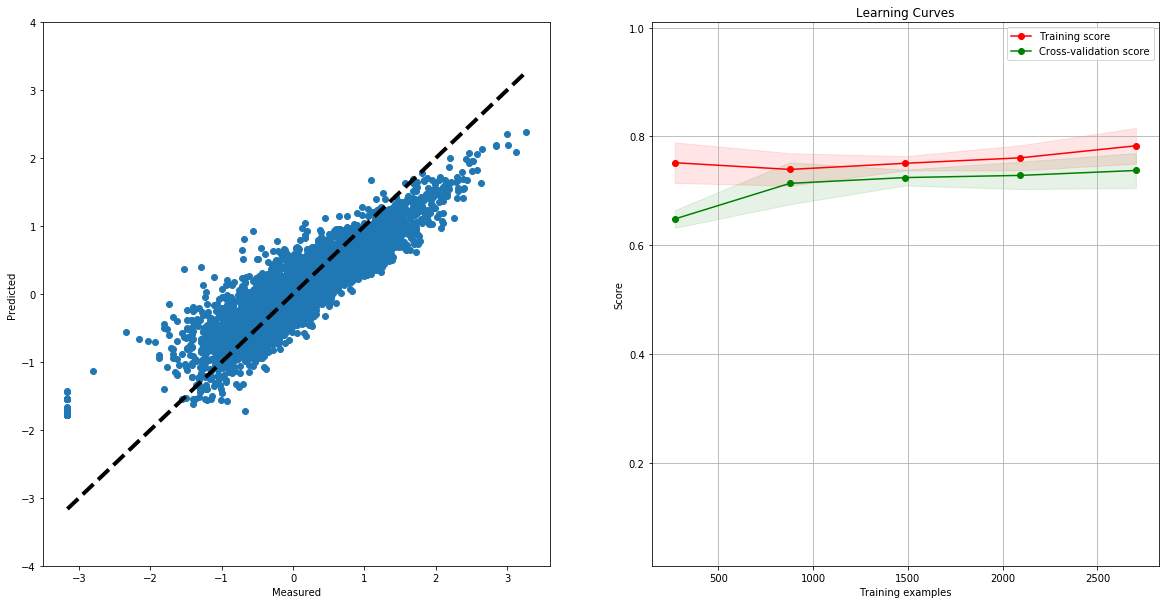

target_set_rankLike Accuracy: 0.69 (+/- 0.08)


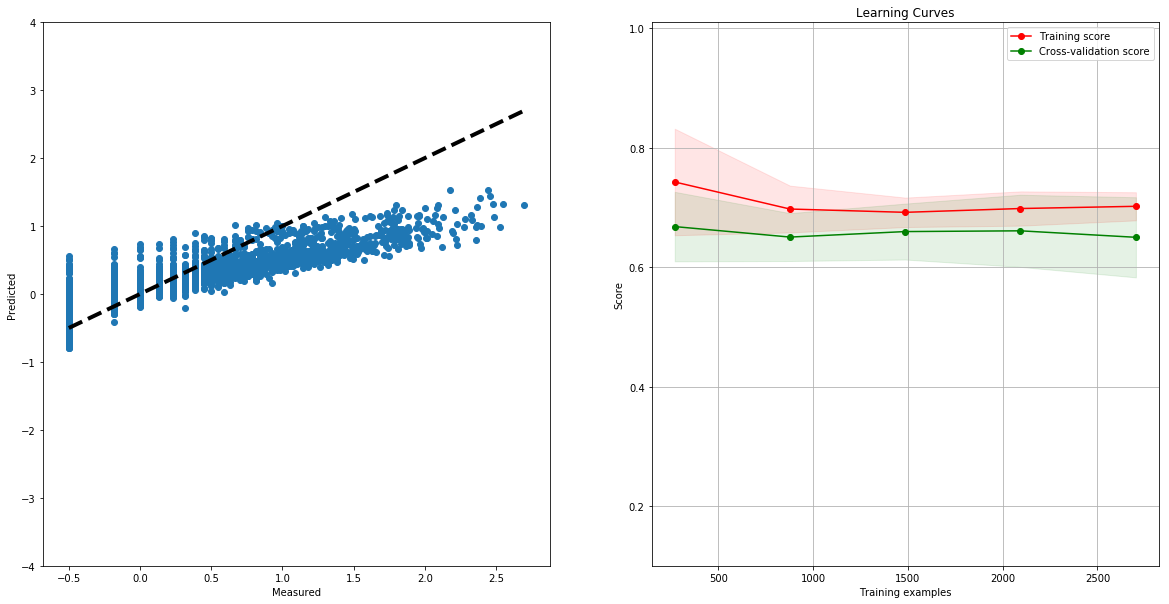

target_set_rankLikeNorm Accuracy: 0.64 (+/- 0.09)


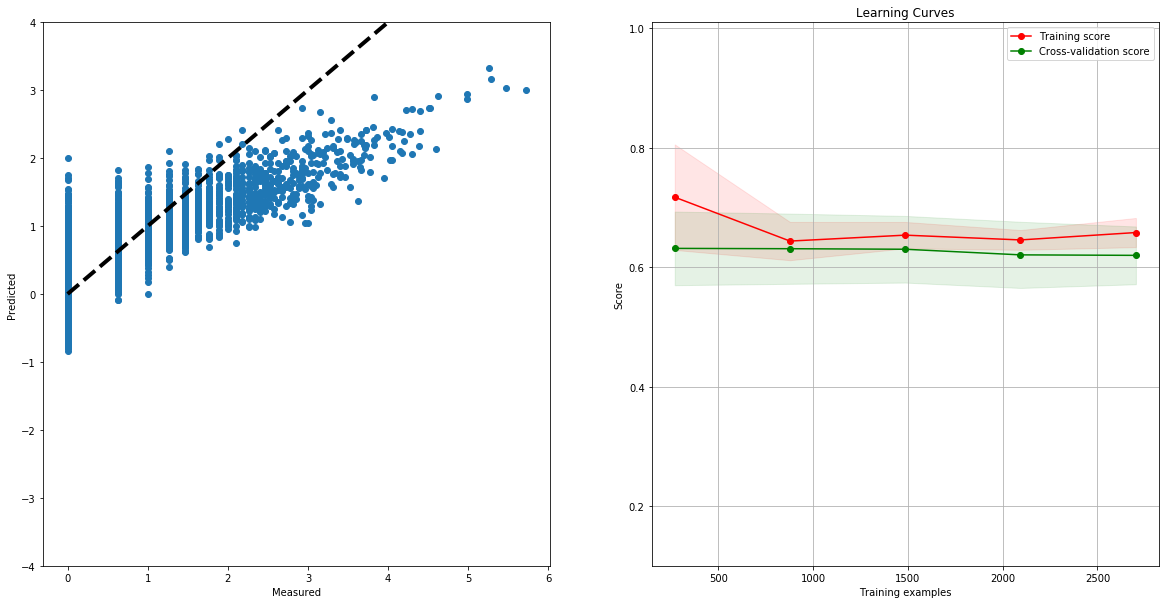

In [20]:
reg = Lasso(alpha=0.09)
model_accuracy(reg)

# Bayesian Regression - BayesianRidge

/home/simo/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


target_set_nLike Accuracy: 0.94 (+/- 0.01)


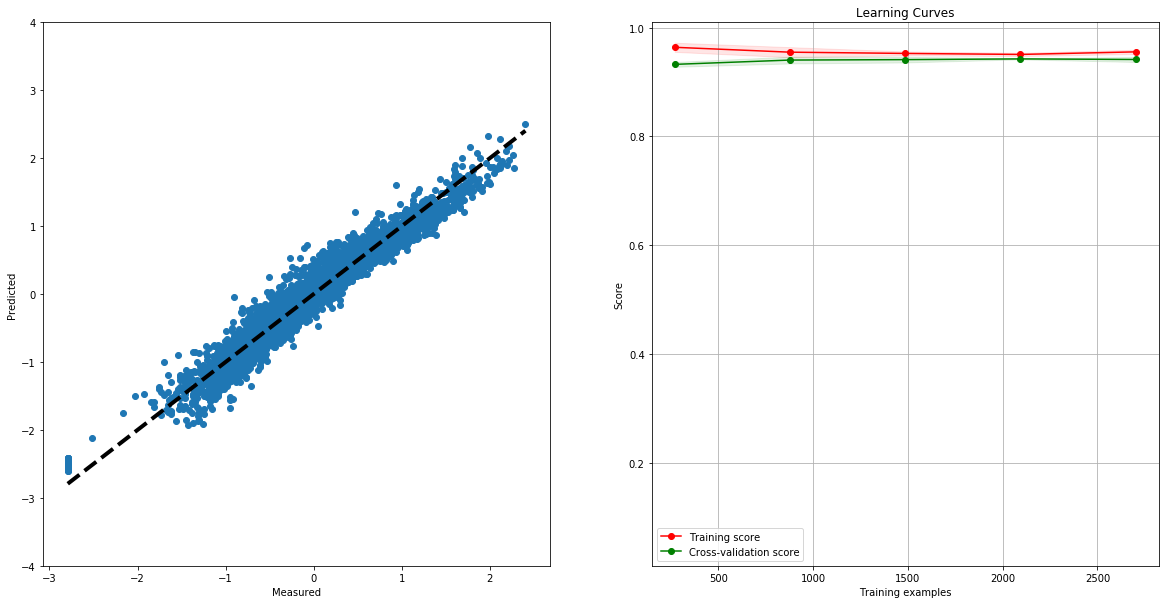

target_set_nLikeNorm Accuracy: 0.92 (+/- 0.03)


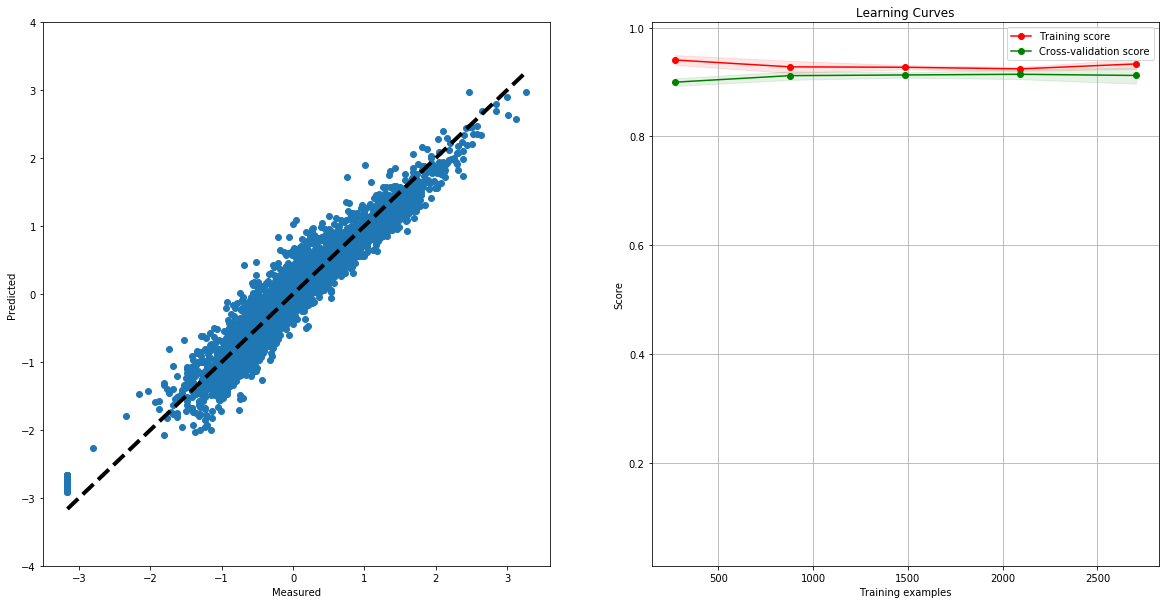

target_set_rankLike Accuracy: 0.86 (+/- 0.06)


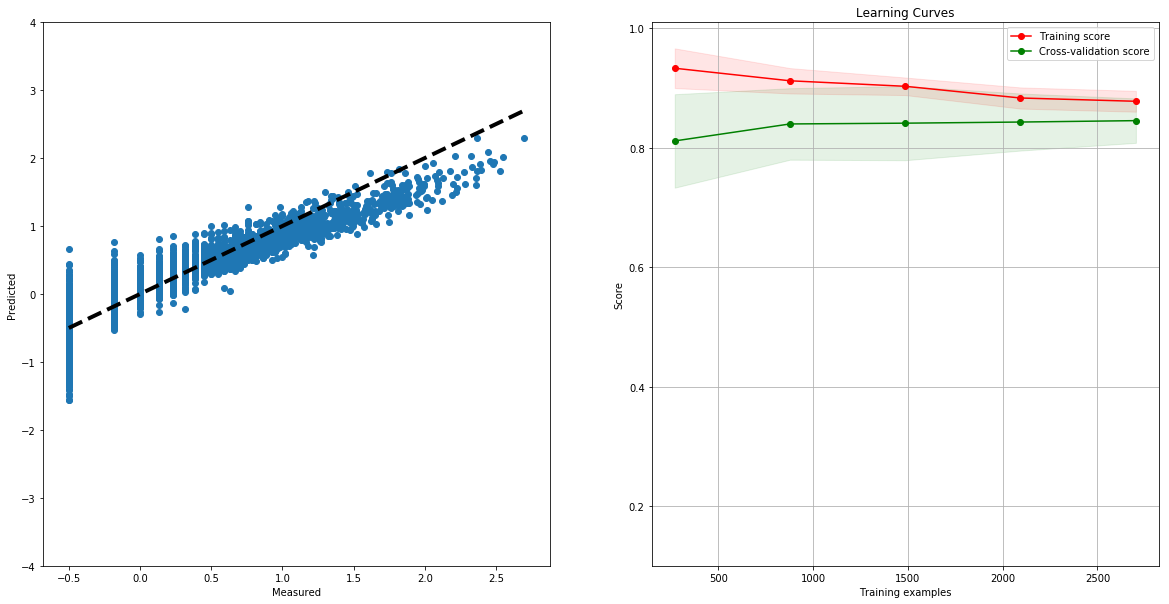

target_set_rankLikeNorm Accuracy: 0.78 (+/- 0.02)


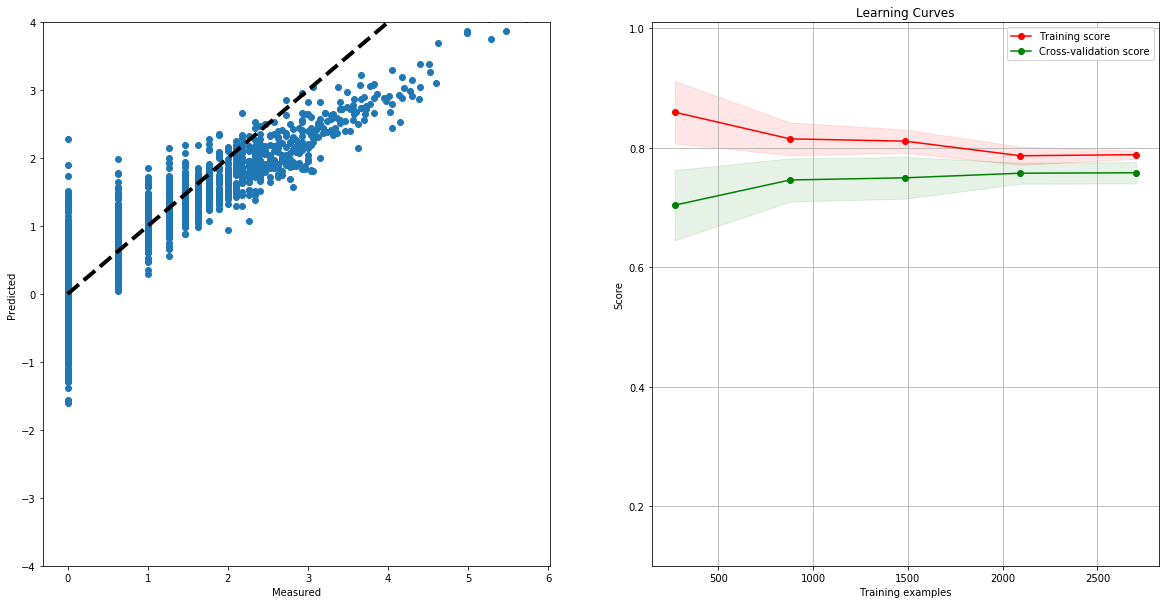

In [21]:
from sklearn.linear_model import BayesianRidge

reg = BayesianRidge()
model_accuracy(reg)

In [27]:
reg.get_params

<bound method BayesianRidge.get_params of BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
       fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
       normalize=False, tol=0.001, verbose=False)>

# Stochastic Gradient Descent - SGDRegressor

target_set_nLike Accuracy: 0.93 (+/- 0.02)


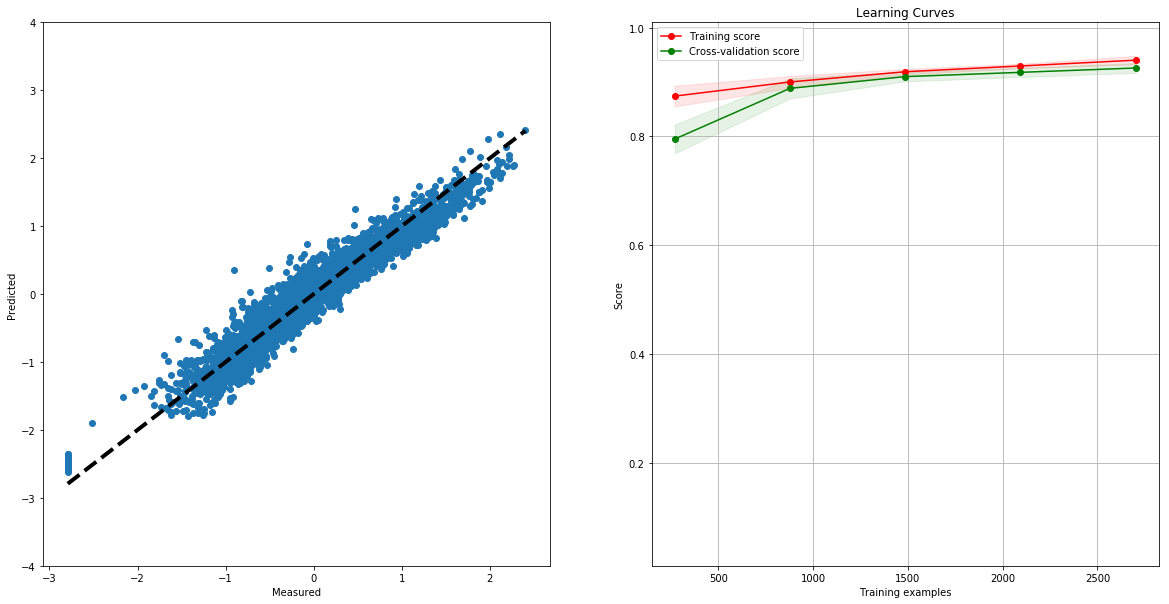

target_set_nLikeNorm Accuracy: 0.91 (+/- 0.04)


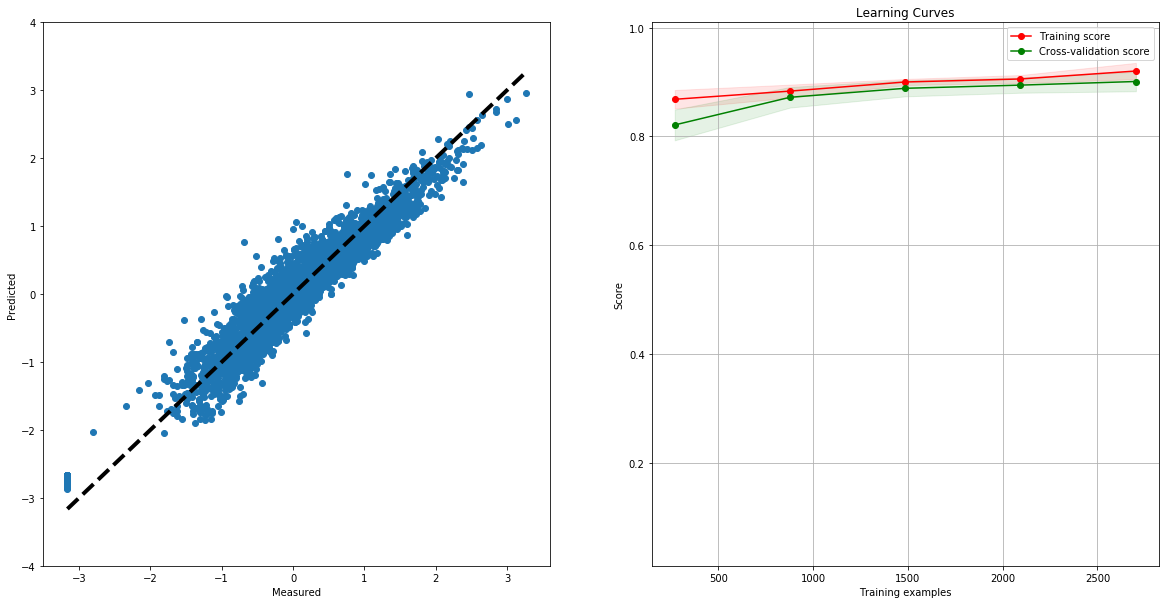

target_set_rankLike Accuracy: 0.84 (+/- 0.05)


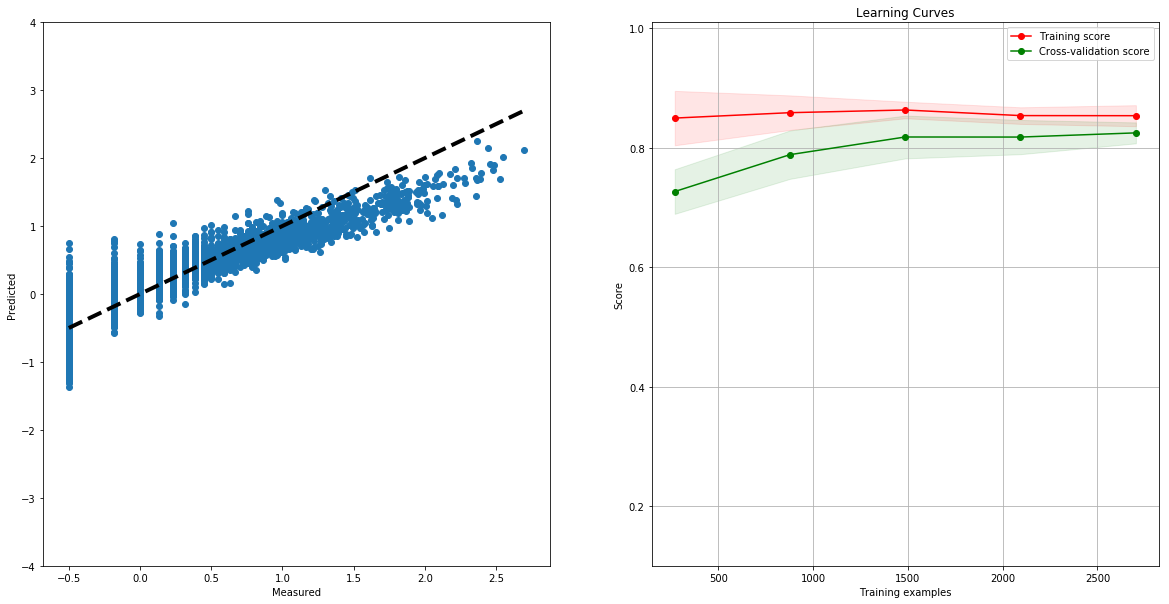

target_set_rankLikeNorm Accuracy: 0.76 (+/- 0.03)


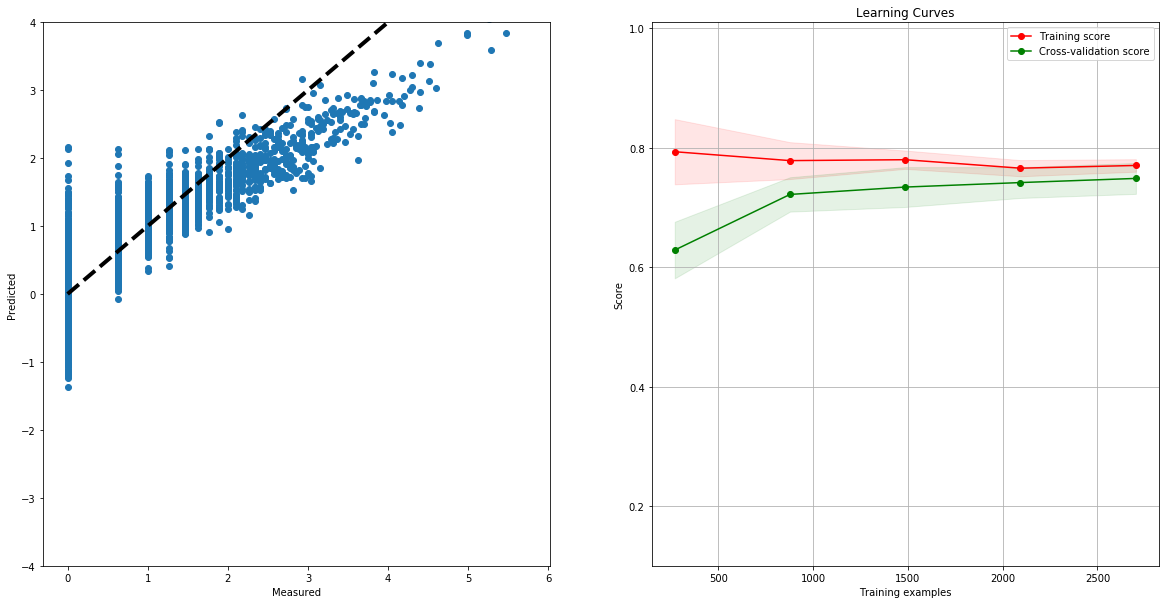

In [22]:
from sklearn.linear_model import SGDRegressor

reg = SGDRegressor(max_iter=1000, tol=1e-3)
model_accuracy(reg)

# Robustness regression: outliers and modeling errors

### RANSAC: RANdom SAmple Consensus

target_set_nLike Accuracy: 0.94 (+/- 0.02)


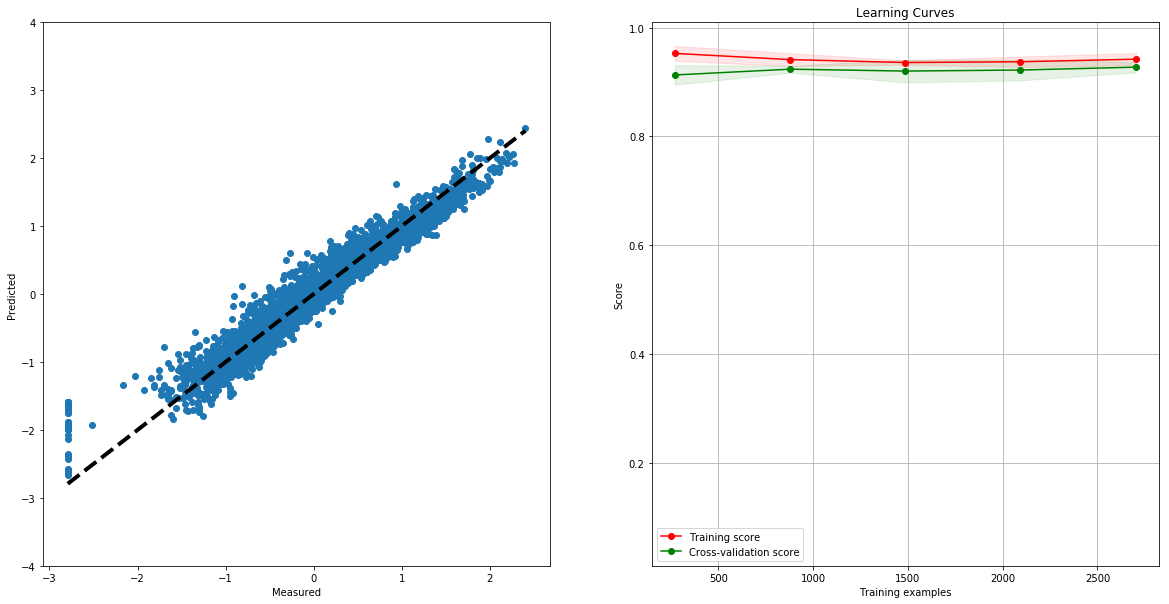

target_set_nLikeNorm Accuracy: 0.89 (+/- 0.02)


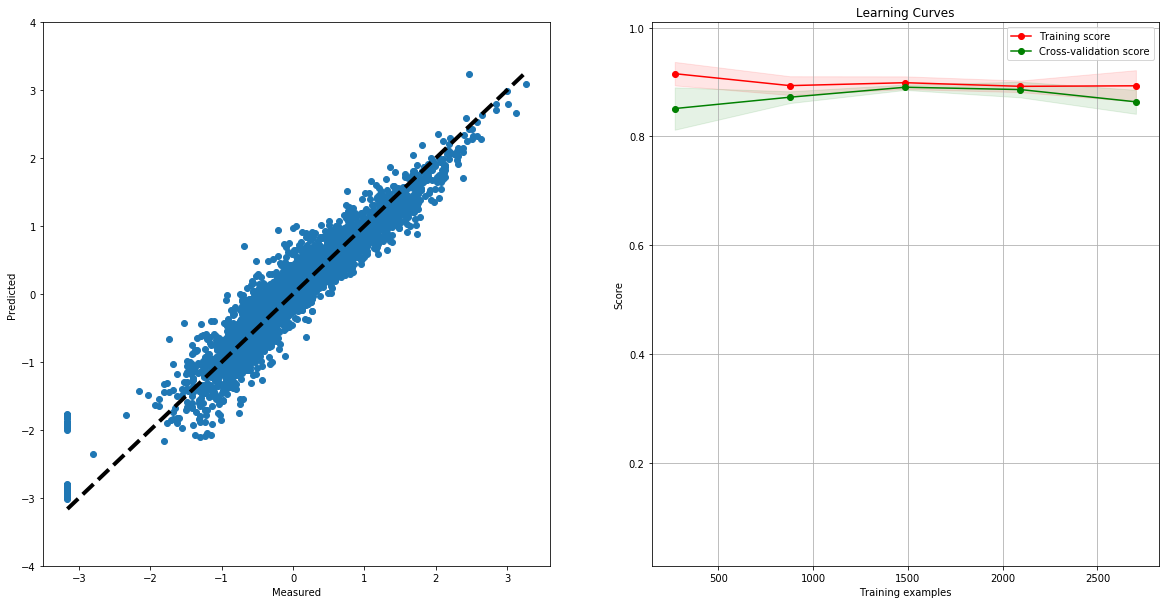

target_set_rankLike Accuracy: 0.80 (+/- 0.14)


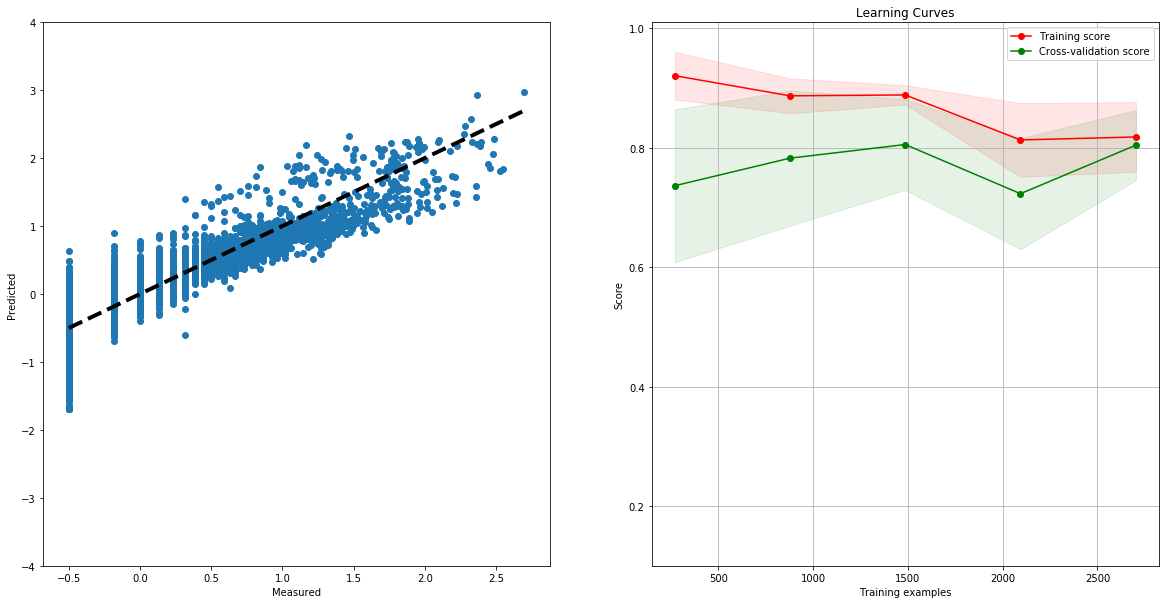

ValueError: RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).

In [21]:
from sklearn.linear_model import RANSACRegressor

reg = RANSACRegressor()
model_accuracy(reg)

### Huber Regression

Fit hyperparameters

In [21]:
import random
from sklearn.linear_model import HuberRegressor

# prepare a uniform distribution to sample for the alpha parameter
param = []
for i in range(10):
    param.append(random.uniform(0, 1)) 
    
epsilon_values = [1.35, 1.5, 1.75, 1.9]

param_grid = {
                'alpha': param,
                'epsilon': epsilon_values
             }


model = HuberRegressor()
rsearch = GridSearchCV(estimator=model, param_grid=param_grid)

rsearch.fit(samples_scaled, target_set_nLike)
print 'target_set_nLike'
print 'score: ', rsearch.best_score_ 
print 'alpha: ', rsearch.best_estimator_.alpha
print 'epsilon: ', rsearch.best_estimator_.epsilon
print '\n'

rsearch.fit(samples_scaled, target_set_nLikeNorm)
print 'target_set_nLikeNorm'
print 'score: ', rsearch.best_score_ 
print 'alpha: ', rsearch.best_estimator_.alpha
print 'epsilon: ', rsearch.best_estimator_.epsilon
print '\n'

rsearch.fit(samples_scaled, target_set_rankLike)
print 'target_set_rankLike'
print 'score: ', rsearch.best_score_ 
print 'alpha: ', rsearch.best_estimator_.alpha
print 'epsilon: ', rsearch.best_estimator_.epsilon
print '\n'

rsearch.fit(samples_scaled, target_set_rankLikeNorm)
print 'target_set_rankLikeNorm'
print 'score: ', rsearch.best_score_ 
print 'alpha: ', rsearch.best_estimator_.alpha
print 'epsilon: ', rsearch.best_estimator_.epsilon

target_set_nLike
score:  0.9397068922554618
alpha:  0.698366907548
epsilon:  1.9


target_set_nLikeNorm
score:  0.9095901284899381
alpha:  0.396642995622
epsilon:  1.9


target_set_rankLike
score:  0.8452134011192595
alpha:  0.79181526905
epsilon:  1.9


target_set_rankLikeNorm
score:  0.7587917910321664
alpha:  0.698366907548
epsilon:  1.9


In [22]:
reg = HuberRegressor(alpha=0.698, epsilon=1.9)
scores = cross_val_score(reg, samples_scaled, target_set_nLike, cv=5, scoring='explained_variance')
print("%s Accuracy: %0.2f (+/- %0.2f)" % ('target_set_nLike', scores.mean(), scores.std() * 2))

reg = HuberRegressor(alpha=0.3966, epsilon=1.9)
scores = cross_val_score(reg, samples_scaled, target_set_nLikeNorm, cv=5, scoring='explained_variance')
print("%s Accuracy: %0.2f (+/- %0.2f)" % ('target_set_nLikeNorm', scores.mean(), scores.std() * 2))

reg = HuberRegressor(alpha=0.7918, epsilon=1.9)
scores = cross_val_score(reg, samples_scaled, target_set_rankLike, cv=5, scoring='explained_variance')
print("%s Accuracy: %0.2f (+/- %0.2f)" % ('target_set_rankLike', scores.mean(), scores.std() * 2))

reg = HuberRegressor(alpha=0.698, epsilon=1.9)
scores = cross_val_score(reg, samples_scaled, target_set_rankLikeNorm, cv=5, scoring='explained_variance')
print("%s Accuracy: %0.2f (+/- %0.2f)" % ('target_set_rankLikeNorm', scores.mean(), scores.std() * 2))

target_set_nLike Accuracy: 0.94 (+/- 0.01)
target_set_nLikeNorm Accuracy: 0.92 (+/- 0.03)
target_set_rankLike Accuracy: 0.86 (+/- 0.06)
target_set_rankLikeNorm Accuracy: 0.78 (+/- 0.02)


# SVR

Fit hyperparameters

In [23]:
param_grid={
            "C": [1e0, 1e1, 1e2, 1e3], 
            "gamma": np.logspace(-2, 2, 5),
            "epsilon":  [0, 0.01, 0.1, 0.5, 1, 2, 4]
           }

model = SVR(kernel='rbf', gamma=0.1)
rsearch = GridSearchCV(estimator=model, param_grid=param_grid)

rsearch.fit(samples_scaled, target_set_nLike)
print 'target_set_nLike'
print 'score: ', rsearch.best_score_ 
print 'C: ', rsearch.best_estimator_.C
print 'gamma: ', rsearch.best_estimator_.gamma
print 'epsilon: ', rsearch.best_estimator_.epsilon
print '\n'

rsearch.fit(samples_scaled, target_set_nLikeNorm)
print 'target_set_nLikeNorm'
print 'score: ', rsearch.best_score_ 
print 'C: ', rsearch.best_estimator_.C
print 'gamma: ', rsearch.best_estimator_.gamma
print 'epsilon: ', rsearch.best_estimator_.epsilon
print '\n'

rsearch.fit(samples_scaled, target_set_rankLike)
print 'target_set_rankLike'
print 'score: ', rsearch.best_score_ 
print 'C: ', rsearch.best_estimator_.C
print 'gamma: ', rsearch.best_estimator_.gamma
print 'epsilon: ', rsearch.best_estimator_.epsilon
print '\n'

rsearch.fit(samples_scaled, target_set_rankLikeNorm)
print 'target_set_rankLikeNorm'
print 'score: ', rsearch.best_score_ 
print 'C: ', rsearch.best_estimator_.C
print 'gamma: ', rsearch.best_estimator_.gamma
print 'epsilon: ', rsearch.best_estimator_.epsilon

KeyboardInterrupt: 

target_set_nLike Accuracy: 0.97 (+/- 0.01)


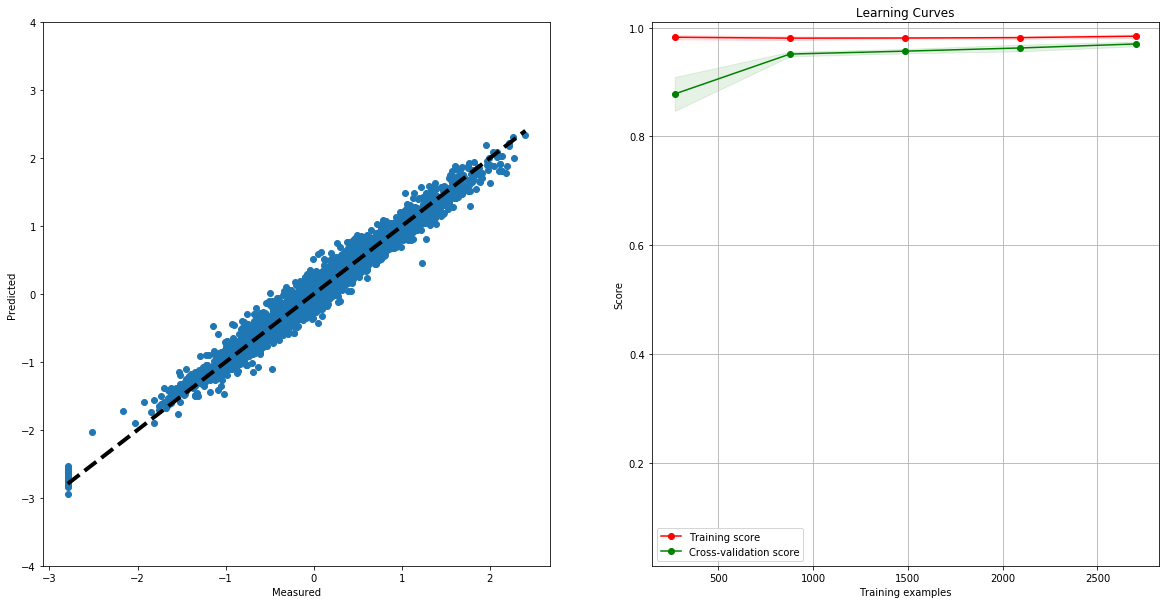

target_set_nLikeNorm Accuracy: 0.96 (+/- 0.02)


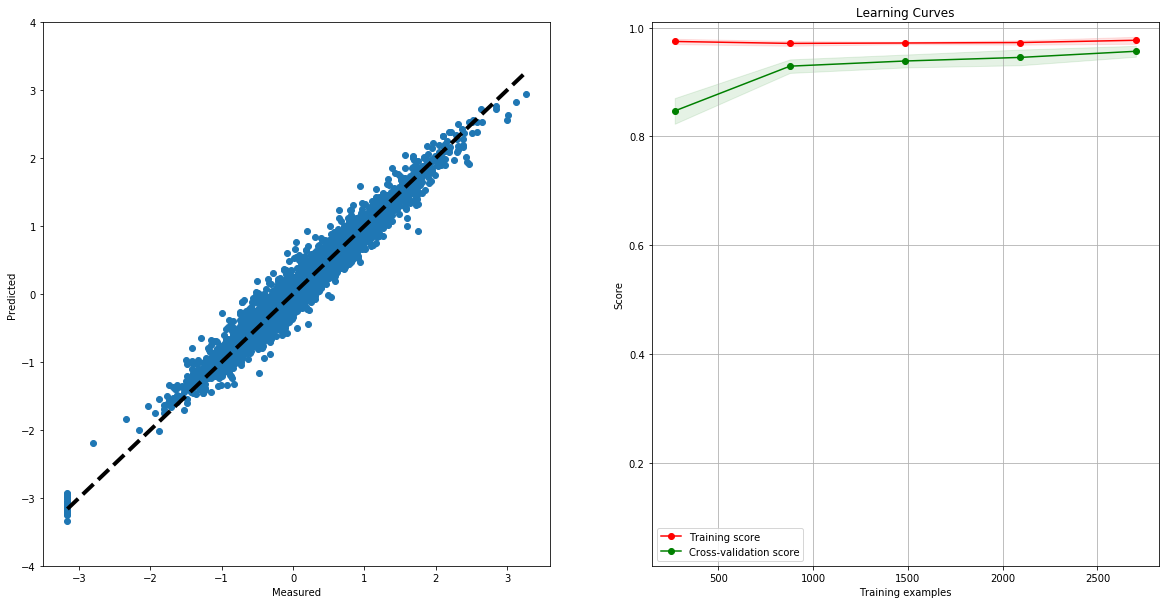

target_set_rankLike Accuracy: 0.95 (+/- 0.01)


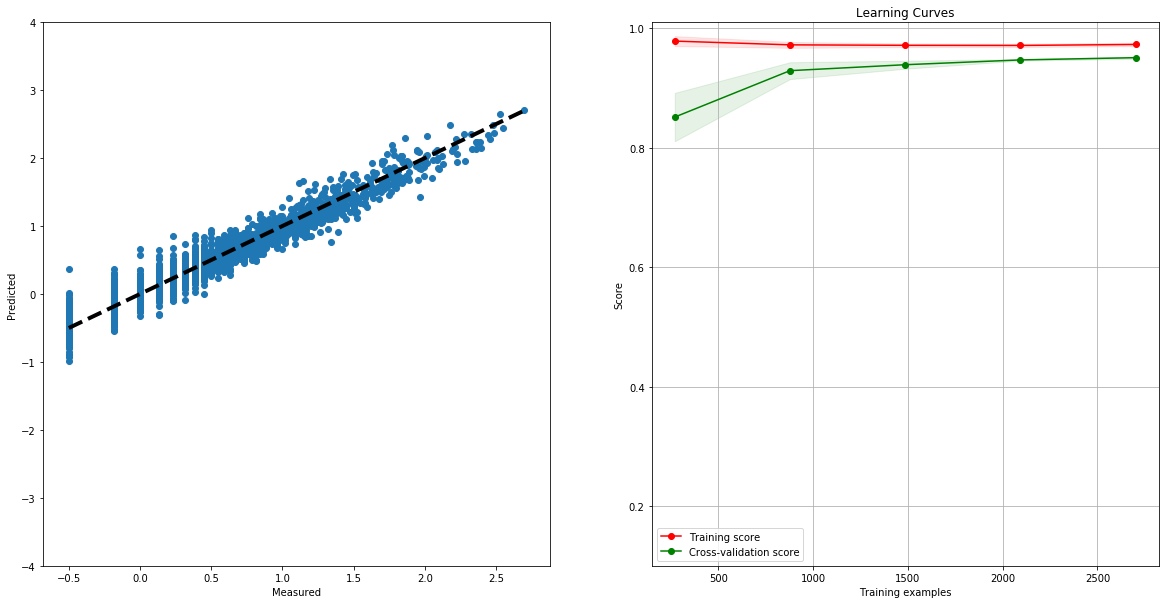

target_set_rankLikeNorm Accuracy: 0.93 (+/- 0.03)


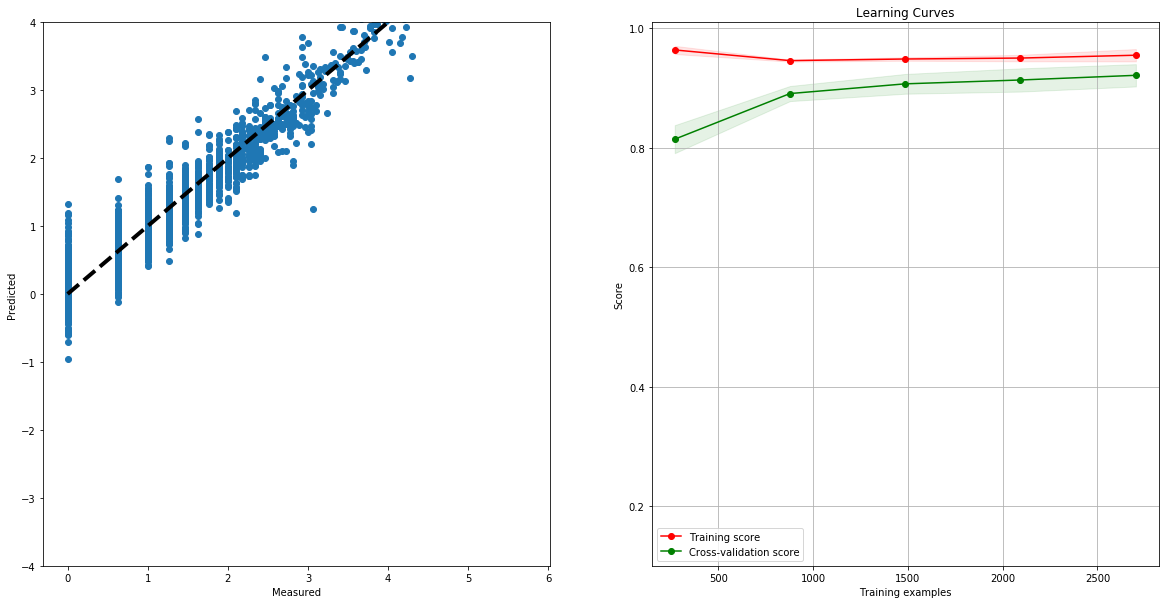

In [24]:
from sklearn.svm import SVR

"""reg = SVR(kernel='rbf',C=100.0, gamma=0.01, epsilon=0.01)
model_accuracy(reg)
print '\n'"""

reg = SVR(kernel='rbf',C=100.0, gamma=0.01, epsilon=0.1)
model_accuracy(reg)